# Imports

In [62]:
from utils.utils import grab_data
from utils.clustering import (create_cluster_data, get_candidate_cluster_n_values,
create_clusters, create_cluster_df, graph_pair_plot, graph_pair_plot_plotly)

# Grabbing Data

In [63]:
seasons = grab_data(by_position=True, by_player=False)

In [64]:
seasons_dict = dict()
for year, season in seasons:
    seasons_dict[year] = season

seasons_dict["2010"].keys()

dict_keys(['RB', 'WR', 'QB', 'TE'])

## QB Data

In [65]:
qbs = seasons_dict["2022"]["QB"]
qbs.sort()
qbs.reverse()

## RB Data

In [66]:
rbs = seasons_dict["2022"]["RB"]
rbs.sort()
rbs.reverse()

## WR Data

In [67]:
wrs = seasons_dict["2022"]["WR"]
wrs.sort()
wrs.reverse()

## TE Data

In [68]:
tes = seasons_dict["2022"]["TE"]
tes.sort()
tes.reverse()

# Position

In [69]:
players = qbs[:30]
position = players[0].position

# Testing Function

In [70]:
suffix = "rushing-per-game"
font_size = 10
marker_size = 6
dim = 1000

## Generating X

In [71]:
# for receiving stats
# stats = ["Receiving Yards", "Receptions", "Receiving TDs", "Targets"]
# stats = ["Receiving Yards Per Game", "Receptions Per Game", "Receiving TDs Per Game", "Targets Per Game"]

# for passing stats
# stats = ["Passing Yards", "Attempts", "Completions", "Passing TDs", "Interceptions"]
# stats = ["Passing Yards Per Game", "Attempts Per Game", "Completions Per Game", "Passing TDs Per Game", "Interceptions Per Game"]

# for rushing stats
# stats = ["Rushing Yards", "Carries", "Yards Per Carry", "Rushing Touchdowns", "Fumbles"]
stats = ["Rushing Yards Per Game", "Carries Per Game", "Yards Per Carry", "Rushing Touchdowns Per Game", "Fumbles Per Game"]

# totals
# stats = ["Total Yards", "Total TDs", "Receptions", "Targets", "Carries", "Yards Per Carry", "Fumbles"]
# stats = ["Yards Per Game", "TDs Per Game", "Receptions Per Game", "Targets Per Game", "Carries Per Game", "Yards Per Carry", "Fumbles Per Game"]


In [72]:
X, X_scaled = create_cluster_data(players=players, stats=stats)

In [73]:
# X_scaled

## Finding Optimal N Value

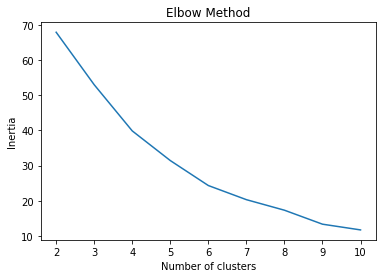

KMeans(algorithm='elkan', n_clusters=10, n_init=10)

In [74]:
get_candidate_cluster_n_values(X_scaled=X_scaled)

## Graph Clusters

### Cluster Size 3

In [75]:
chosen_cluster_number = 3

In [76]:
labels_3, cluster_ranking_3 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

In [77]:
# labels_3

In [78]:
# cluster_ranking_3

### Cluster Size 4

In [79]:
chosen_cluster_number = 4

In [80]:
labels_4, cluster_ranking_4 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

In [81]:
# labels_4

In [82]:
# cluster_ranking_4

### Cluster Size 5

In [83]:
chosen_cluster_number = 5

In [84]:
labels_5, cluster_ranking_5 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

In [85]:
# labels_5

In [86]:
# cluster_ranking_5

### Cluster 6 Size

In [87]:
chosen_cluster_number = 6

In [88]:
labels_6, cluster_ranking_6 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

In [89]:
# labels_6

In [90]:
# cluster_ranking_6

### Cluster 7 Size

In [91]:
chosen_cluster_number = 7

In [92]:
labels_7, cluster_ranking_7 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

In [93]:
# labels_7

In [94]:
# cluster_ranking_7

# Graphing Clusters

In [95]:
import pandas as pd

def html_breaking_down_clusters(keys):
    """"""
    print("<p class='blog-p-tag'>")
    print("\tTODO:")
    print("\t<ul class='bullet-list'>")
    for key in keys:
        print(f"\t\t<li><b>Cluster {key}:</b> TODO</li>")
        
    print("\t</ul>")
    print("""</p>
<p class="blog-p-tag">
    TODO
</p>""")

def create_cluster_html_tiers(df: pd.DataFrame) -> None:
    cluster_dict = dict()
    for index, row in df.iterrows():
        if row.Cluster not in cluster_dict:
            cluster_dict[row.Cluster] = [index]
        else:
            cluster_dict[row.Cluster].append(index)
            
    sorted_cluster_dict = dict(sorted(cluster_dict.items()))
    keys = list(sorted_cluster_dict.keys())
    
    html_breaking_down_clusters(keys)
    print("<div style='display: flex; justify-content: space-evenly;''>")
    for key in keys:
        names = cluster_dict[key]
        
        print("\t<div>")
        print(f"\t\t<b>Cluster {key} ()</b>")
        print("\t\t<ul class='bullet-list'>")
        for name in names:
            print(f"\t\t\t<li>{name}</li>")
        print("\t\t</ul>")
        print("\t</div>")
        if key != keys[-1]:
            print()
    print("</div>")

### 3 Clusters

In [101]:
df_3 = create_cluster_df(labels=labels_3, X=X, stats=stats)

In [102]:
graph_pair_plot_plotly(df=df_3, cluster_rankings=cluster_ranking_3,
                       position=position, stats=stats, 
                       save_suffix=suffix, font_size=font_size, marker_size=marker_size,
                       height=dim, width=dim
                      )

In [103]:
create_cluster_html_tiers(df_3)

<p class='blog-p-tag'>
	TODO:
	<ul class='bullet-list'>
		<li><b>Cluster 0:</b> TODO</li>
		<li><b>Cluster 1:</b> TODO</li>
		<li><b>Cluster 2:</b> TODO</li>
	</ul>
</p>
<p class="blog-p-tag">
    TODO
</p>
<div style='display: flex; justify-content: space-evenly;''>
	<div>
		<b>Cluster 0 ()</b>
		<ul class='bullet-list'>
			<li>Patrick Mahomes</li>
			<li>Joe Burrow</li>
			<li>Geno Smith</li>
			<li>Trevor Lawrence</li>
			<li>Russell Wilson</li>
			<li>Dak Prescott</li>
			<li>Jacoby Brissett</li>
			<li>Kenny Pickett</li>
		</ul>
	</div>

	<div>
		<b>Cluster 1 ()</b>
		<ul class='bullet-list'>
			<li>Josh Allen</li>
			<li>Jalen Hurts</li>
			<li>Justin Fields</li>
			<li>Daniel Jones</li>
			<li>Lamar Jackson</li>
			<li>Kyler Murray</li>
			<li>Marcus Mariota</li>
		</ul>
	</div>

	<div>
		<b>Cluster 2 ()</b>
		<ul class='bullet-list'>
			<li>Kirk Cousins</li>
			<li>Jared Goff</li>
			<li>Justin Herbert</li>
			<li>Tom Brady</li>
			<li>Aaron Rodgers</li>
			<li>Tua Tagovailoa</

### 4 Clusters

In [38]:
df_4 = create_cluster_df(labels=labels_4, X=X, stats=stats)

In [39]:
graph_pair_plot_plotly(df=df_4, cluster_rankings=cluster_ranking_4,
                       position=position, stats=stats, 
                       save_suffix=suffix, font_size=font_size, marker_size=marker_size,
                       height=dim, width=dim
                      )

In [40]:
create_cluster_html_tiers(df_4)

<div style='display: flex; justify-content: space-evenly;''>
	<div>
		<b>Cluster 0 ()</b>
		<ul class='bullet-list'>
			<li>Kirk Cousins</li>
			<li>Jared Goff</li>
			<li>Justin Herbert</li>
			<li>Tom Brady</li>
			<li>Aaron Rodgers</li>
			<li>Tua Tagovailoa</li>
			<li>Derek Carr</li>
			<li>Davis Mills</li>
			<li>Andy Dalton</li>
			<li>Mac Jones</li>
			<li>Jimmy Garoppolo</li>
			<li>Ryan Tannehill</li>
		</ul>
	</div>

	<div>
		<b>Cluster 1 ()</b>
		<ul class='bullet-list'>
			<li>Josh Allen</li>
			<li>Jalen Hurts</li>
			<li>Justin Fields</li>
			<li>Daniel Jones</li>
			<li>Lamar Jackson</li>
			<li>Kyler Murray</li>
			<li>Marcus Mariota</li>
		</ul>
	</div>

	<div>
		<b>Cluster 2 ()</b>
		<ul class='bullet-list'>
			<li>Patrick Mahomes</li>
			<li>Joe Burrow</li>
			<li>Geno Smith</li>
			<li>Trevor Lawrence</li>
			<li>Russell Wilson</li>
			<li>Dak Prescott</li>
			<li>Jacoby Brissett</li>
			<li>Kenny Pickett</li>
		</ul>
	</div>

	<div>
		<b>Cluster 3 ()</b>
		<ul cla

### 5 Clusters

In [41]:
df_5 = create_cluster_df(labels=labels_5, X=X, stats=stats)

In [42]:
graph_pair_plot_plotly(df=df_5, cluster_rankings=cluster_ranking_5,
                       position=position, stats=stats, 
                       save_suffix=suffix, font_size=font_size, marker_size=marker_size,
                       height=dim, width=dim
                      )

In [43]:
create_cluster_html_tiers(df_5)

<div style='display: flex; justify-content: space-evenly;''>
	<div>
		<b>Cluster 0 ()</b>
		<ul class='bullet-list'>
			<li>Josh Allen</li>
			<li>Daniel Jones</li>
			<li>Lamar Jackson</li>
			<li>Kyler Murray</li>
			<li>Marcus Mariota</li>
		</ul>
	</div>

	<div>
		<b>Cluster 1 ()</b>
		<ul class='bullet-list'>
			<li>Kirk Cousins</li>
			<li>Jared Goff</li>
			<li>Justin Herbert</li>
			<li>Tom Brady</li>
			<li>Aaron Rodgers</li>
			<li>Tua Tagovailoa</li>
			<li>Derek Carr</li>
			<li>Davis Mills</li>
			<li>Andy Dalton</li>
			<li>Mac Jones</li>
			<li>Jimmy Garoppolo</li>
			<li>Ryan Tannehill</li>
		</ul>
	</div>

	<div>
		<b>Cluster 2 ()</b>
		<ul class='bullet-list'>
			<li>Matt Ryan</li>
			<li>Baker Mayfield</li>
			<li>Taylor Heinicke</li>
		</ul>
	</div>

	<div>
		<b>Cluster 3 ()</b>
		<ul class='bullet-list'>
			<li>Jalen Hurts</li>
			<li>Justin Fields</li>
		</ul>
	</div>

	<div>
		<b>Cluster 4 ()</b>
		<ul class='bullet-list'>
			<li>Patrick Mahomes</li>
			<li>Joe B

### 6 Clusters

In [44]:
df_6 = create_cluster_df(labels=labels_6, X=X, stats=stats)

In [45]:
graph_pair_plot_plotly(df=df_6, cluster_rankings=cluster_ranking_6,
                       position=position, stats=stats, 
                       save_suffix=suffix, font_size=font_size, marker_size=marker_size,
                       height=dim, width=dim
                      )

In [46]:
create_cluster_html_tiers(df_6)

<div style='display: flex; justify-content: space-evenly;''>
	<div>
		<b>Cluster 0 ()</b>
		<ul class='bullet-list'>
			<li>Kirk Cousins</li>
			<li>Jared Goff</li>
			<li>Justin Herbert</li>
			<li>Tom Brady</li>
			<li>Aaron Rodgers</li>
			<li>Tua Tagovailoa</li>
			<li>Derek Carr</li>
			<li>Davis Mills</li>
			<li>Andy Dalton</li>
			<li>Mac Jones</li>
			<li>Jimmy Garoppolo</li>
			<li>Ryan Tannehill</li>
		</ul>
	</div>

	<div>
		<b>Cluster 1 ()</b>
		<ul class='bullet-list'>
			<li>Josh Allen</li>
			<li>Daniel Jones</li>
			<li>Lamar Jackson</li>
			<li>Kyler Murray</li>
			<li>Marcus Mariota</li>
		</ul>
	</div>

	<div>
		<b>Cluster 2 ()</b>
		<ul class='bullet-list'>
			<li>Trevor Lawrence</li>
			<li>Matt Ryan</li>
			<li>Baker Mayfield</li>
			<li>Taylor Heinicke</li>
		</ul>
	</div>

	<div>
		<b>Cluster 3 ()</b>
		<ul class='bullet-list'>
			<li>Patrick Mahomes</li>
			<li>Joe Burrow</li>
			<li>Geno Smith</li>
			<li>Russell Wilson</li>
			<li>Dak Prescott</li>
			<li>Ja

### 7 Clusters

In [47]:
df_7 = create_cluster_df(labels=labels_7, X=X, stats=stats)

In [48]:
graph_pair_plot_plotly(df=df_7, cluster_rankings=cluster_ranking_7,
                       position=position, stats=stats, 
                       save_suffix=suffix, font_size=font_size, marker_size=marker_size,
                       height=dim, width=dim
                      )

In [49]:
create_cluster_html_tiers(df_7)

<div style='display: flex; justify-content: space-evenly;''>
	<div>
		<b>Cluster 0 ()</b>
		<ul class='bullet-list'>
			<li>Trevor Lawrence</li>
			<li>Matt Ryan</li>
			<li>Baker Mayfield</li>
			<li>Taylor Heinicke</li>
		</ul>
	</div>

	<div>
		<b>Cluster 1 ()</b>
		<ul class='bullet-list'>
			<li>Daniel Jones</li>
			<li>Lamar Jackson</li>
		</ul>
	</div>

	<div>
		<b>Cluster 2 ()</b>
		<ul class='bullet-list'>
			<li>Patrick Mahomes</li>
			<li>Joe Burrow</li>
			<li>Geno Smith</li>
			<li>Russell Wilson</li>
			<li>Derek Carr</li>
			<li>Dak Prescott</li>
			<li>Jacoby Brissett</li>
			<li>Kenny Pickett</li>
		</ul>
	</div>

	<div>
		<b>Cluster 3 ()</b>
		<ul class='bullet-list'>
			<li>Jalen Hurts</li>
		</ul>
	</div>

	<div>
		<b>Cluster 4 ()</b>
		<ul class='bullet-list'>
			<li>Kirk Cousins</li>
			<li>Jared Goff</li>
			<li>Justin Herbert</li>
			<li>Tom Brady</li>
			<li>Aaron Rodgers</li>
			<li>Tua Tagovailoa</li>
			<li>Davis Mills</li>
			<li>Andy Dalton</li>
			<li>Mac